### TASKS:

* Download data on survival times for liver cancer patients as well as expression data from their sequenced tumors.
* For each transcript, create a survival analysis model, using the lifelines package.  Here each transcript can be tested using, for instance, a Cox’s Proportional Hazard model. Test each transcript by itself as a potential prognostic marker for the survival of the patients.
* As before, apply multiple hypothesis corrections to your calculated p-values.
* Report the number of expression levels that you find prognostic for the survival of the patients in the cohort as a function of q-value.

### Things to be done before the task is done
* These data are the raw data, where there few things needed to bes sorted. For example, the data is the shape of features in the rows and samples in the columns. For the model to be used it needed to get into other way form.
* Survial analysis as per now my understanding is similar to logistical regression , however gives uses the coefficient of hazard that indicates the survival index after point.
* Here we need to preprocess the dataset in order to make them work with the survival model to be used for.
* the first 6 rows are the catargorical variables so first I will precprocess it and change the variables.
* I will read first the raw datset and subset the dummy dataset of say 100 featues. Work with it first and scale for all the big dataset.

In [1]:
import os as os
import pandas as pd

os.chdir("/Users/salendrapradh/Documents/prj_algo_bioinfo/data/")

sur_df_catagories = pd.read_table("survivalLIHC.txt", header=0,index_col=0, sep="\t",
                                  usecols =list(range(0,365)),skiprows = list (range(7,19578)))

sur_df_expression = pd.read_table("survivalLIHC.txt", header=0,index_col=0, 
                                    sep="\t",usecols =list(range(0,365)),
                                    skiprows = list (range(1,7)))

print(sur_df_catagories.shape)
print(sur_df_expression.shape)

(6, 364)
(19571, 364)


In [456]:
sur_df_expression.head()
## drop the rows with all zeros in expression dataframe

sur_df_expression =sur_df_expression[(sur_df_expression.T != 0).any()]
sur_df_expression.shape

(19346, 364)

In [457]:
sur_df_expression["ENSG00000171478"]

KeyError: 'ENSG00000171478'

In [2]:
print (sur_df_catagories.loc["Gender",:].value_counts())
print (sur_df_catagories.loc["Race",:].value_counts())
print (sur_df_catagories.loc["Stage",:].value_counts())
print (sur_df_catagories.loc["Status",:].value_counts())

male      245
female    119
Name: Gender, dtype: int64
white                               182
asian                               154
black or african american            17
not reported                         10
american indian or alaska native      1
Name: Race, dtype: int64
stage i         170
stage ii         83
stage iiia       63
not reported     24
stage iiic        9
stage iiib        8
stage iii         3
stage ivb         2
stage iva         1
stage iv          1
Name: Stage, dtype: int64
alive    234
dead     130
Name: Status, dtype: int64


In [193]:
sur_df_expression.tail()

,TCGA-FV-A2QQ-01A,TCGA-O8-A75V-01A,TCGA-ED-A7XO-01A,TCGA-BC-A69H-01A,TCGA-DD-A4NR-01A,TCGA-DD-AAEG-01A,TCGA-5C-A9VH-01A,TCGA-4R-AA8I-01A,TCGA-XR-A8TE-01A,TCGA-DD-AAC8-01A,...,TCGA-EP-A2KB-01A,TCGA-CC-A8HS-01A,TCGA-DD-AAE4-01A,TCGA-CC-5258-01A,TCGA-KR-A7K7-01A,TCGA-DD-A39W-01A,TCGA-DD-AACY-01A,TCGA-WX-AA46-01A,TCGA-G3-A7M5-01A,TCGA-DD-AAE9-01A
TCGA.IDs,,,,,,,,,,,,,,,,,,,,,
ENSG00000281741,0.210408,0.151118,0.092051,1.287334,0.087925,0.134062,0.021976,0.542547,0.000000,0.0,...,0.0,0.157354,0.127886,0.192778,0.07152,0.000000,0.172847,0.027668,0.236476,0.000000
ENSG00000281760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000281855,0.000000,0.000000,0.000000,0.000000,0.637752,0.270111,1.992481,0.000000,1.865174,0.0,...,0.0,0.356670,0.000000,0.000000,0.00000,0.304053,1.253716,0.501704,0.000000,0.636871
ENSG00000281887,0.008434,0.000000,0.011069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000281889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
## Well there is complete cases for gender and Status features (which is of course should be easy !!!), however the 
## problem are with other features i.e "Stage" and "Race" lets make a dictionary of encoding and change it 

encoders = {"Race" : {"white": 1, "asian": 2, "black or african american": 3, 
                       "american indian or alaska native": 4, "not reported": "NaN"},
            "Stage" : {"stage i": 1, "stage ii": 2, "stage iii": 3, "stage stage iv": 4,
                       "stage iiia": 5, "stage iiib" : 6, "stage iiic": 7,
                        "stage iva": 8, "stage ivb": 9 , "not reported" : "NaN"},
            "Gender" : {"male": 1, "female": 2},
            "Status" : {"alive": 0, "dead": 1}
           }
sur_df_catagories.T.replace(encoders).head()
## tried with inplace == True but works with only few at moment so used this in later code where it can be used to 
## to change while subsetting for each features

TCGA.IDs,Gender,Race,Stage,Status,Age,LivingDays
TCGA-FV-A2QQ-01A,1,1,1,0,29354,729
TCGA-O8-A75V-01A,1,NaN,1,0,19850,538
TCGA-ED-A7XO-01A,1,2,5,0,10828,427
TCGA-BC-A69H-01A,1,1,2,0,23380,444
TCGA-DD-A4NR-01A,2,1,1,1,31386,9


In [70]:
surv_all = pd.concat([sur_df_catagories, sur_df_expression])

In [71]:
surv_all.shape

(19352, 364)

In [1042]:
## Now since we have all the data in python, we can further explore using python survival implmentation. For this, lets
## first work out with one feature of gene. We would like our dataset to have the normal n X features

feature  = surv_all.loc[["Status","LivingDays","ENSG00000234278"], :].T.replace(encoders).copy()
feature.dtypes
feature['LivingDays'] = feature['LivingDays'].astype('float64')
feature["ENSG00000234278"] = feature['ENSG00000234278'].astype('float64')

feature.head()

TCGA.IDs,Status,LivingDays,ENSG00000234278
TCGA-FV-A2QQ-01A,0,729.0,0.0
TCGA-O8-A75V-01A,0,538.0,0.0
TCGA-ED-A7XO-01A,0,427.0,0.0
TCGA-BC-A69H-01A,0,444.0,0.0
TCGA-DD-A4NR-01A,1,9.0,0.0


In [1043]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(feature, 'LivingDays', event_col = 'Status')
p_value = cph.summary.loc["ENSG00000234278"][-3]
cph.summary

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000234278'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000234278'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/fitters/coxph_fitter.py:370: RuntimeWarning: invalid value encountered in sqrt
  se = np.sqrt(inv(-self._hessian_).diagonal()) / self._norm_s

,coef,exp(coef),se(coef),z,p,lower 0.95,upper 0.95
TCGA.IDs,,,,,,,
ENSG00000234278,4359.55892,inf,NaN,NaN,NaN,NaN,NaN


In [407]:
print (p_value)

0.183275978599


AttributeError: 'CoxPHFitter' object has no attribute 'baseline_cumulative_hazard_'

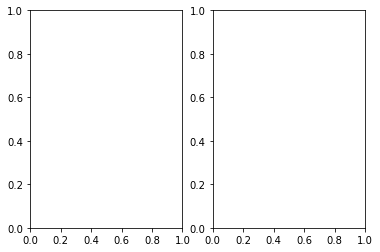

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
cph.baseline_cumulative_hazard_.plot(ax = axes[0], title = "Baseline Cumulative Hazard")
cph.baseline_survival_.plot(ax = axes[1], title = "Baseline Survival")

In [ ]:
cph.plot()


###### Well upto this point, we have a survival analysis for one of the feature, particulary  "ENSG00000000003". Although the p-value doesn't look any interesting. Now lets scale up to all the features from our complete dataset. This would require looping in complete dataframe i.e surv_all. Well we can do it loop rowise in our datset and take each features consequtively and store p.values in dictionary containaing the feature name 

In [887]:
tmp = surv_all.loc["ENSG00000279906":"ENSG00000281889",:]

In [888]:
tmp.shape

(97, 364)

In [889]:
tmp2 = pd.concat([sur_df_catagories,tmp ])

In [890]:
tmp2.head(n = 7)

,TCGA-FV-A2QQ-01A,TCGA-O8-A75V-01A,TCGA-ED-A7XO-01A,TCGA-BC-A69H-01A,TCGA-DD-A4NR-01A,TCGA-DD-AAEG-01A,TCGA-5C-A9VH-01A,TCGA-4R-AA8I-01A,TCGA-XR-A8TE-01A,TCGA-DD-AAC8-01A,...,TCGA-EP-A2KB-01A,TCGA-CC-A8HS-01A,TCGA-DD-AAE4-01A,TCGA-CC-5258-01A,TCGA-KR-A7K7-01A,TCGA-DD-A39W-01A,TCGA-DD-AACY-01A,TCGA-WX-AA46-01A,TCGA-G3-A7M5-01A,TCGA-DD-AAE9-01A
TCGA.IDs,,,,,,,,,,,,,,,,,,,,,
Gender,male,male,male,male,female,female,male,male,male,male,...,female,male,female,male,female,female,male,male,male,male
Race,white,not reported,asian,white,white,asian,white,white,white,asian,...,white,asian,asian,asian,white,white,asian,white,asian,asian
Stage,stage i,stage i,stage iiia,stage ii,stage i,stage i,stage i,stage ii,stage iiia,stage i,...,stage i,stage iiic,stage i,stage ii,stage ii,stage iii,stage i,stage ii,stage i,stage i
Status,alive,alive,alive,alive,dead,alive,alive,dead,alive,dead,...,dead,dead,alive,dead,alive,dead,alive,alive,alive,alive
Age,29354,19850,10828,23380,31386,21853,25608,24279,5862,26322,...,16835,6617,18009,17586,22587,10699,22332,22639,27963,25451
LivingDays,729,538,427,444,9,719,322,262,925,16,...,596,300,608,129,951,827,1450,756,447,722
ENSG00000279906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1044]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
features = ["Status", "LivingDays"]
other_features = ["Age", "Race", "Stage", "Gender"]

erroronous_features = ["ENSG00000006116", "ENSG00000077063", "ENSG00000082556", 
                       "ENSG00000091844", "ENSG00000094661","ENSG00000100146",
                       "ENSG00000100292", "ENSG00000101282", "ENSG00000104818",
                      "ENSG00000105143", "ENSG00000109101", "ENSG00000113196",
                      "ENSG00000114113","ENSG00000121351", "ENSG00000121742",
                       "ENSG00000123407", "ENSG00000123576","ENSG00000123977",
                      "ENSG00000124493","ENSG00000127252","ENSG00000128714",
                       "ENSG00000129152","ENSG00000130711","ENSG00000131096","ENSG00000132932",
                      "ENSG00000133433","ENSG00000133878","ENSG00000134438","ENSG00000134762",
                      "ENSG00000136099","ENSG00000136943","ENSG00000139304","ENSG00000139780",
                      "ENSG00000140481","ENSG00000142549","ENSG00000143546","ENSG00000143595",
                      "ENSG00000145087","ENSG00000146151","ENSG00000147571","ENSG00000148604",
                       "ENSG00000148408","ENSG00000234278",
                      "ENSG00000149968","ENSG00000152430","ENSG00000152463","ENSG00000154645",
                      "ENSG00000155622","ENSG00000157884","ENSG00000159409","ENSG00000161652",
                      "ENSG00000163220","ENSG00000163530","ENSG00000164256","ENSG00000165588",
                      "ENSG00000165643","ENSG00000167531","ENSG00000168269","ENSG00000169059",
                      "ENSG00000169807","ENSG00000169836","ENSG00000169840","ENSG00000169906",
                      "ENSG00000170477","ENSG00000170748","ENSG00000170890","ENSG00000170959",
                      "ENSG00000171360","ENSG00000171478","ENSG00000174562","ENSG00000176782",
                      "ENSG00000176887","ENSG00000176922","ENSG00000177143","ENSG00000177186",
                      "ENSG00000177504","ENSG00000178597","ENSG00000179008","ENSG00000179046",
                      "ENSG00000179412","ENSG00000179603","ENSG00000181767","ENSG00000182103",
                      "ENSG00000182177","ENSG00000182261","ENSG00000182645","ENSG00000183862",
                      "ENSG00000184345","ENSG00000184507","ENSG00000184697","ENSG00000185448",
                      "ENSG00000185823","ENSG00000186086","ENSG00000186895","ENSG00000186912",
                      "ENSG00000187170","ENSG00000187690","ENSG00000188782","ENSG00000189299",
                      "ENSG00000196218","ENSG00000196427","ENSG00000197616","ENSG00000197870",
                      "ENSG00000198601","ENSG00000198765","ENSG00000203909","ENSG00000204595",
                      "ENSG00000204767","ENSG00000204849","ENSG00000205279","ENSG00000206043",
                      "ENSG00000206579","ENSG00000214819","ENSG00000215029","ENSG00000221900",
                      "ENSG00000224089","ENSG00000224109","ENSG00000226372","ENSG00000240224",
                      "ENSG00000240386","ENSG00000254834", "ENSG00000255223","ENSG00000265303",
                       "ENSG00000265763","ENSG00000273049","ENSG00000276040","ENSG00000279824", 
                      "ENSG00000279849","ENSG00000279850","ENSG00000279857"]

result = {}

#for names, value in tmp2.iterrows():
for names, value in surv_all.iterrows():
    if names in features or names in other_features or names in erroronous_features:
        continue
    feature_df = surv_all.loc[features+[names],:].T.replace(encoders).copy() 
    feature_df['LivingDays'] = feature_df['LivingDays'].astype('float64')
    feature_df[names] = feature_df[names].astype('float64')
    cph.fit(feature_df, 'LivingDays', event_col = 'Status')
    p_value = cph.summary.loc[names][-3]
    result [names] = p_value


/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000006059'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000006059'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000008197'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000101203'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000101438'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000101438'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logist

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000106304'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000106304'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000106341'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000116996'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000116996'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000117501'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000122728'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000122728'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000123165'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000125522'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000125522'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000125533'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000129862'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000129862'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000129864'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000132975'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000132975'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000133105'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000136697'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000136839'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000136839'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logist

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000141946'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000141946'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000142224'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000147081'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000147081'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000147613'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000149507'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000149507'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000149651'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000151838'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000151838'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000152093'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000156282'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000156282'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000156575'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000162456'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000162456'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000162621'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000164458'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000164458'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000164500'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000166368'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000166368'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000166748'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000168930'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000168930'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000169154'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000170484'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000170605'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000170605'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logist

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000170953'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000170953'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000170967'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000171505'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000171505'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000171532'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000172289'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000172289'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000172320'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000172519'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000172519'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000172742'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000173679'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000173679'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000174016'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000174937'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000174937'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000174948'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000175619'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000175619'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000175718'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000176256'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000176256'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000176269'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000176774'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000176774'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000176797'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000177324'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000177324'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000177462'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000178403'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000178403'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000178586'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000179615'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000179615'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000179626'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000180269'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000180347'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000180347'] have very low variance when conditioned on death event or not. This may 

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000181693'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000181693'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000181718'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000182053'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000182053'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000182070'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000182613'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000182613'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000182698'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000183054'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000183054'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000183090'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000183791'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000183791'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000184033'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000184761'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000184761'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000184911'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000185775'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000185775'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000185821'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000186143'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000186143'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000186146'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000186628'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000186628'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000186788'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000186971'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000186971'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000187003'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000187664'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000187664'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000187701'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000188340'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000188340'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000188379'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000189090'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000189090'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000189132'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000196171'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000196171'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000196184'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000196826'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000196826'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000196832'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000197454'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000197454'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000197591'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000197991'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000197991'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000198083'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000198445'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000198445'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000198570'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000203795'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000203795'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000203818'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000204363'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000204363'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000204414'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000204873'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000204873'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000204880'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000205457'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000205495'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000205495'] have very low variance when conditioned on death event or not. This may 

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000206199'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000206199'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000206260'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000212900'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000212900'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000212933'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000214414'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000214414'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000214518'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000215343'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000215343'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000215356'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000221836'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000221836'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000221837'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000221931'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000221931'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000221933'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000223417'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000223417'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000223443'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000228567'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000228567'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000229183'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000232268'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000232382'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000232382'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logist

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000235376'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000235376'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000236027'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000237521'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000237521'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000237763'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000241595'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000241595'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000241690'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000248672'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000248672'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000249139'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000251380'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000251380'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000251569'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000255378'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000255524'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000255524'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logist

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000256671'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000256671'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000256825'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000258724'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000258724'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000258817'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000261130'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000261130'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000261272'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000267168'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000267168'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000267261'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000268714'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000268714'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000268988'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000270136'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000270136'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000270181'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000273590'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000273590'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000273976'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000275038'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000275038'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000275217'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000277865'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000277865'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000277932'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000279274'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000279282'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000279282'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logist

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000280410'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000280427'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000280427'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logist

In [1045]:
list(result.keys())[-1]

'ENSG00000281889'

In [1046]:
len(list(result.keys()))

19219

##### there is a error given by the model when running for all the features,. It calls out as ValueError: delta contains nan value(s). Convergence halted. I am wondiering that the values are too low to give any model output . At the moment, I can finding out these features that gives all these errros and possibly later debug it. It is named under the list erronoeus list at the moment. Additionally, I made a change to remove all the features that had 0 expression in all features


### Part 2 Make the q values of the p-values that we made for the eariler analysis 

For this we need to have to consider using the function that was made earlier in our class. However it has to be made more robust in comparision to the one that we had done earlier. Here I have used the codes that was made earlier.


In [1047]:
import numpy as np
import numpy.random as npr
import pandas as pd

def bootstrap(invec):
    idx = npr.randint(0, len(invec), len(invec))
    return [invec[i] for i in idx]

def estimatePi0(p, numBoot=100, numLambda=100, maxLambda=0.95):
    p.sort()
    n=len(p)
    lambdas=np.linspace(maxLambda/numLambda,maxLambda,numLambda)
    Wls=np.array([n-np.argmax(p>=l) for l in lambdas])
    pi0s=np.array([Wls[i] / (n * (1 - lambdas[i])) for i in range(numLambda)])
    minPi0=np.min(pi0s)
    mse = np.zeros(numLambda)
    for boot in range(numBoot):
        pBoot = bootstrap(p)
        pBoot.sort()
        WlsBoot =np.array([n-np.argmax(pBoot>=l) for l in lambdas])
        pi0sBoot =np.array([WlsBoot[i] / (n *(1 - lambdas[i])) for i in range(numLambda)])
        mse = mse + np.square(pi0sBoot-minPi0)
    minIx = np.argmin(mse)
    return pi0s[minIx]

# The input to this function is tupples of p-values and analyte names, e.g. (p,coord)
def qvalues(pvalues):
    m=len(pvalues)
    pvalues.sort()
    pi0 = estimatePi0([p for p,coord in pvalues])
    num_p, qs = 0.0, []
    for p,coord in pvalues:
        num_p += 1.0
        q = pi0*p*m/num_p
        qs.append((q,p,coord))
    qs.reverse()
    old_q=1.0
    for ix in range(len(qs)):
        q = min(old_q,qs[ix][0])
        old_q = q
        qs[ix] = (q,qs[ix][1],qs[ix][2])
    qs.reverse()
    return qs

In [1100]:
Result_df= pd.DataFrame(list(result.items()), columns=['Gene_ID', 'p_value'])
sorted_result_df = Result_df.sort_values(["p_value"])

In [1102]:
sorted_result_df.head()

,Gene_ID,p_value
14780,ENSG00000183520,1.622069e-13
8178,ENSG00000143179,3.046395e-12
947,ENSG00000065978,5.244555e-12
6809,ENSG00000134697,1.966585e-11
6808,ENSG00000134690,2.256371e-11


In [1104]:
p_values_list = np.array(sorted_result_df[1]
gene_id = np.array(sorted_result_df["Gene_ID"])

In [1107]:
p_values_list

array([  1.62206908e-13,   3.04639546e-12,   5.24455531e-12, ...,
         9.99718265e-01,   9.99772489e-01,   9.99843799e-01])

In [1109]:
##Estimate lambda values 

p_values = np.array(p_values_list)
length = len(p_values)
lamda = np.arange(0.01, 0.96,0.01)
weights =np.array([length-np.argmax(p_values>=l) for l in lamda])
estpi0=np.array([weights[i] / (length * (1 - lamda[i])) for i in range(lamda.size)])
min_estpi_0= np.min(estpi0)
min_estpi_0

0.54187448432726548

In [1111]:
index= 0
qvalues = []
length = len(p_values)

## for the first part of the equation
for p in p_values:
    index = index+1
    qval = (p * length * min_estpi_0)/ index
    qvalues.append(qval)


## second part of the equation considering the highest of pvalues is 1 at p(n+1) feature and using this to find the min
## at the final values
q_final = 1.0
qvalues.reverse()
for i in range (len(qvalues)):
    q = min(qvalues[i], q_final)
    q_final = q
    qvalues[i]= q

qvalues.reverse()

In [1115]:
Final_dataframe = pd.DataFrame(list(zip(p_values, qvalues, gene_id)))

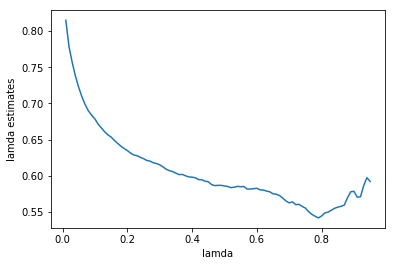

In [1114]:
plt.plot(lamda,estpi0)
plt.ylabel("lamda estimates")
plt.xlabel("lamda")
plt.show()

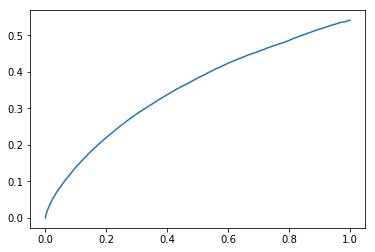

In [1117]:
plt.plot(Final_dataframe[0],Final_dataframe[1])
plt.show()

In [1119]:
accepted_gene = Final_dataframe[Final_dataframe[1] < 0.1]

In [1121]:
accepted_gene.shape

(6483, 3)

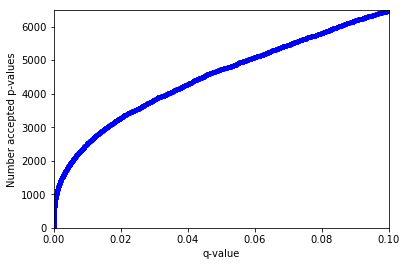

In [1122]:
import numpy as np
import matplotlib.pyplot as plt

#list(range(len(accepted_analyte["p-value"])))

plt.plot(accepted_gene[1], list(range(len(accepted_gene[0]))),'b.')
plt.ylabel("Number accepted p-values")
plt.xlabel("q-value")
plt.xlim(0,0.1)
plt.ylim(0,6483list(sorted_test_df.index.values))
plt.show()

In [ ]:
list(sorted_test_df.index.values)

In [1048]:
sorted_dict_result = sorted(result.items(), key=lambda x: x[1])
sorted_dict_result[-1]
result_list = []

for val in sorted_dict_result:
    test = (val[1], val[0])
    result_list.append(test)
result_list[1]

In [1091]:
import sys

sys.stdout = open('/Users/salendrapradh/Documents/prj_algo_bioinfo/data/tmp.txt', 'w')

for keys, values in result_list:
    print (keys,values)

('ENSG00000205846', 0.99984379889736485)

In [1049]:
qv = qvalues(result_list)

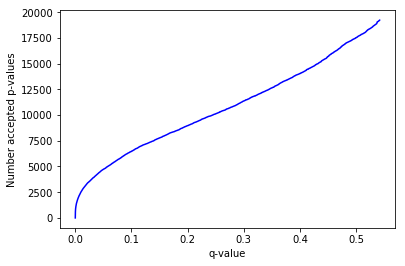

In [1069]:
import matplotlib.pyplot as plt
plt.plot([q[0] for q in qv],list(range(len(qv))),'b-')
plt.ylabel("Number accepted p-values")
plt.xlabel("q-value")
plt.show()

In [1076]:
qv[-1]

(0.54188296204883302, 0.99984379889736485, 'ENSG00000205846')

In [1064]:
plt.plot([sub_var[q[2]] for q in qv],[-np.log10(q[0]) for q in qv],'b.')
plt.ylabel("-log of q-values")
plt.xlabel("variance among subjects")
plt.xlim(.0,0.3)
plt.show()

NameError: name 'sub_var' is not defined